In [1]:
# load data
import pandas as pd
beef = pd.read_csv('beef.csv')
print(beef.head())

   Year  Quarter  Quantity     Price
0  1977        1   22.9976  142.1667
1  1977        2   22.6131  143.9333
2  1977        3   23.4054  146.5000
3  1977        4   22.7401  150.8000
4  1978        1   22.0441  160.0000


In [2]:
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
%matplotlib inline

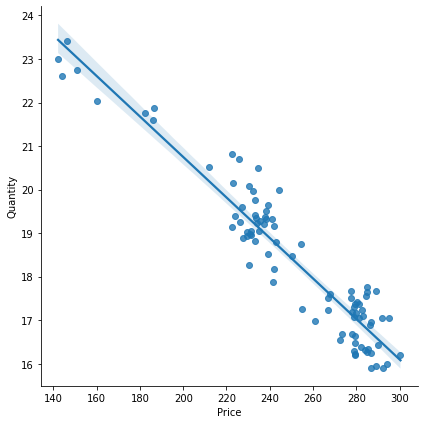

In [3]:
# demand curve
sns.lmplot(x = "Price", y = "Quantity", 
data = beef, height = 6)

In [4]:
# fit OLS model
model = ols("Quantity ~ Price", data = beef).fit()
# print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     811.2
Date:                Fri, 27 Jan 2023   Prob (F-statistic):           1.69e-46
Time:                        17:44:21   Log-Likelihood:                -77.493
No. Observations:                  91   AIC:                             159.0
Df Residuals:                      89   BIC:                             164.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.0515      0.413     72.701      0.0

In [5]:
# plugging regression coefficients
# quantity = 30.05 - 0.0465 * price # eq (5)

# the profit function in eq (3) becomes
# profit = (30.05 - 0.0465 * price) * price - cost # eq (6)

Text(0, 0.5, 'Revenue')

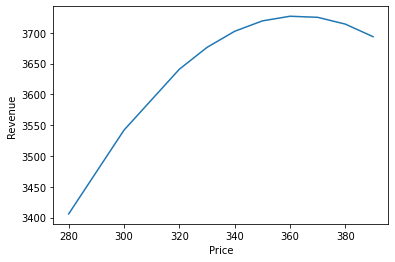

In [6]:
# a range of diffferent prices to find the optimum one
Price = [280, 300, 320, 330, 340, 350, 360, 370, 380, 390]
# assuming a fixed cost
cost = 80
Revenue = []
for i in Price:
   quantity_demanded = 30.05 - 0.0465 * i
   
   # profit function
   Revenue.append((i-cost) * quantity_demanded)

  
# create data frame of price and revenue
profit = pd.DataFrame({"Price": Price, "Revenue": Revenue})
#plot revenue against price
plt.plot(profit["Price"], profit["Revenue"])
plt.xlabel('Price')
plt.ylabel('Revenue')

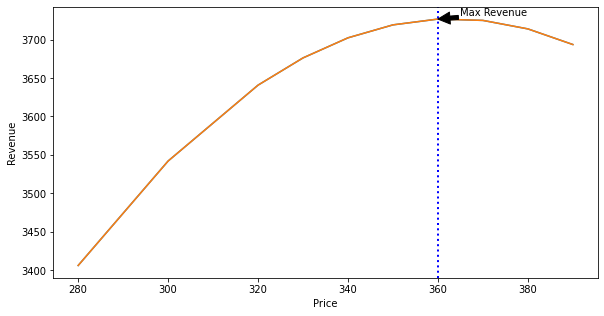

In [7]:
x = profit['Price'].to_numpy()
y = profit['Revenue'].to_numpy()

plt.rcParams["figure.figsize"] = [8.50, 4.50]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
ax.plot(x,y)


line, = ax.plot(x, y)

ymax = max(y)
xpos = np.where(y == ymax)
xmax = x[xpos]

# only one line may be specified; full height
plt.axvline(x=xmax, color='b', ls=':', lw=2,label='axvline - full height')

ax.annotate('Max Revenue', xy=(xmax, ymax), xytext=(xmax + 5, ymax + 5), arrowprops=dict(facecolor='black'),)
plt.xlabel('Price')
plt.ylabel('Revenue')
plt.show()

In [8]:
# price at which revenue is maximum
# profit['Revenue'] == profit['Revenue'].max()
profit[profit['Revenue'] == max(profit['Revenue'])]

,Price,Revenue
6,360,3726.8


In [9]:
X = beef['Price'].values.reshape(-1, 1)
y = beef['Quantity'].values.reshape(-1, 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Linear regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(reg.coef_)
print(reg.intercept_)

[[-0.0478172]]
[30.32715947]


In [10]:
reg.score(X_test, y_test)

0.8567749178569662

In [11]:
# Ridge regression
from sklearn import linear_model
reg1 = linear_model.Ridge(alpha=.5)
reg1.fit(X_train,y_train)
y_pred1 = reg1.predict(X_test)
print(reg1.coef_)
print(reg1.intercept_)

[[-0.04781694]]
[30.32709398]


In [12]:
reg1.score(X_test, y_test)

0.8567764129230719

In [13]:
# Lasso 
from sklearn import linear_model
reg2 = linear_model.Lasso(alpha=0.1)
reg2.fit(X,y)
print(reg2.coef_)
print(reg2.intercept_)

[-0.04643698]
[30.03299912]


In [14]:
# Bayes
from sklearn import linear_model
reg3 = linear_model.BayesianRidge()
reg3.fit(X, y.ravel())
print(reg3.coef_)
print(reg3.intercept_)

[-0.04645415]
30.037300020032887


In [15]:
# ElasticNet
from sklearn.linear_model import ElasticNet
regr = ElasticNet(random_state=0)
regr.fit(X, y)
print(regr.coef_)
print(regr.intercept_)

[-0.04612469]
[29.95478884]
